<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2025/blob/main/IMT_EX_Distribuicao_Vendas_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **CASE: Vendas Diárias**

Ao longo do ano as vendas diárias de uma loja de alimentos estão concentradas em torno de R\$ 5.100 (mediana). É sabido que o volume de vendas de alimentos tem uma distribuição `lognorm` $^1$. O valor do desvio padrão da distribuição lognormal é 0.5 $^2$.

<br>
</small>
$^1$ Isso não é de fato verdadeiro, mas será considerado válido para os propósitos do exercício.

<br>
</small>
$^2$ Tecnicamente, representa o desvio padrão da variável aleatória normalmente distribuída que é exponenciada para obter a variável log-normal.


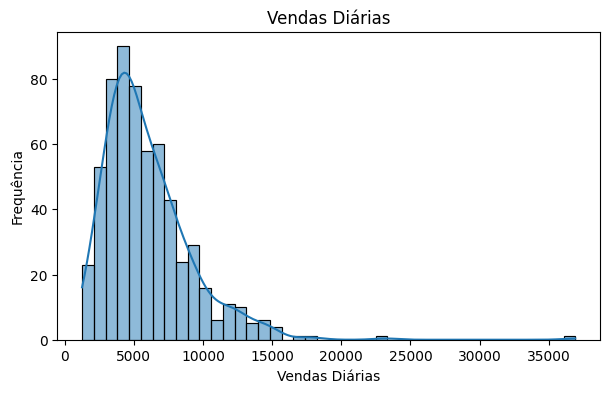

In [ ]:
from scipy.stats import lognorm

plt.figure(figsize=(7,4))
np.random.seed(1)
x = lognorm.rvs(s=0.5, scale=5100, size=600)
sns.histplot(x, kde=True)
plt.title('Vendas Diárias')
plt.xlabel('Vendas Diárias')
plt.ylabel('Frequência')
plt.show()


In [ ]:
np.mean(x), np.std(x), np.median(x)

(np.float64(5969.583348745133),
 np.float64(3243.75521699896),
 np.float64(5225.679644797738))

In [ ]:
shape, loc, scale = lognorm.fit(x, floc=0)  # floc=0 força o deslocamento (loc) a ser 0
shape, loc, scale


(np.float64(0.4990060646787285), 0, np.float64(5269.691042089724))

# Q1A.

Qual a probabilidade das vendas ficarem abaixo de R$ 3.000 em um determinado dia.




In [ ]:
print(f'Probabilidade das vendas ficarem abaixo de R$ 3000 = {np.round(lognorm.cdf(3000,s=0.5,scale=5100)*100,2)}%')

Probabilidade das vendas ficarem abaixo de R$ 3000 = 14.43%


# Q1B.

Qual a probabilidade de termos um dia de faturamento acima de R$ 8.000?




In [ ]:
1 - lognorm.cdf(8000,s=0.5,scale=5100)

np.float64(0.18395317738992456)

# Q1C.

Qual o valor mínimo que você pode esperar vender em 95% dos dias? (renda mínima garantida)




In [ ]:
lognorm.ppf(1 - 0.95,s=0.5,scale=5100)

np.float64(2240.756935130212)

# Q1D.

Com base nos dados de vendas, produza um gráfico de distribuição o mais próximo da figura abaixo (`figsize=(6,3.5)`).

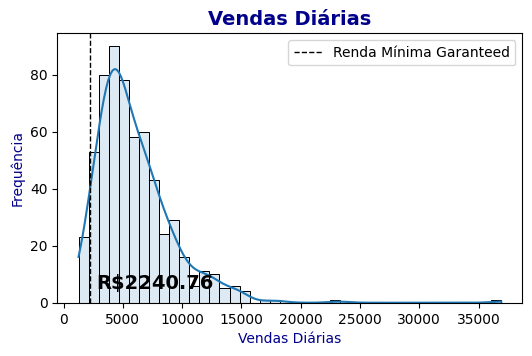

In [ ]:
from scipy.stats import lognorm

plt.figure(figsize=(6,3.5))

sns.histplot(x, kde=True, alpha=0.15)

plt.axvline(x=lognorm.ppf(1 - 0.95,s=0.5,scale=5100), color='k', linestyle='--',linewidth=1,
            label='Renda Mínima Garanteed')
plt.text(x=lognorm.ppf(1 - 0.95,s=0.5,scale=5100)+500, y=5, s="R$" + str(np.round(lognorm.ppf(1 - 0.95,s=0.5,scale=5100),2)),
         color='k',fontsize=14,weight='bold')

plt.legend(fontsize=10)
plt.title('Vendas Diárias',color='darkblue',fontsize=14,weight='bold')
plt.xlabel('Vendas Diárias',color='darkblue')
plt.ylabel('Frequência',color='darkblue')
plt.show()

# Q1E.

Com base nos dados de vendas, produza um gráfico de distribuição o mais próximo da figura abaixo. (`figsize=(12,3.5)`).

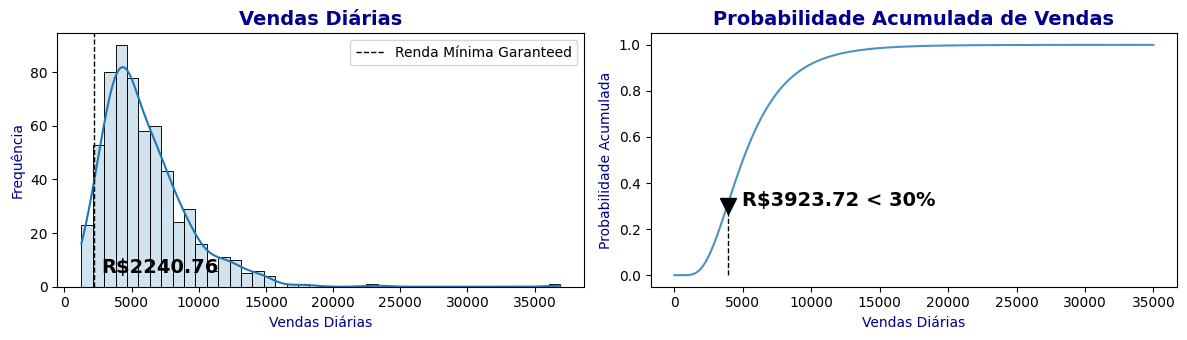

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,3.5))

sns.histplot(x, kde=True, alpha=0.2, ax=ax[0])

ax[0].axvline(x=lognorm.ppf(1 - 0.95,s=0.5,scale=5100), color='k', linestyle='--',linewidth=1,
            label='Renda Mínima Garanteed')
ax[0].text(x=lognorm.ppf(1 - 0.95,s=0.5,scale=5100)+500, y=5, s="R$" + str(np.round(lognorm.ppf(1 - 0.95,s=0.5,scale=5100),2)),
         color='k',fontsize=14,weight='bold')

ax[0].legend(fontsize=10)
ax[0].set_title('Vendas Diárias',color='darkblue',fontsize=14,weight='bold')
ax[0].set_xlabel('Vendas Diárias',color='darkblue')
ax[0].set_ylabel('Frequência',color='darkblue')

x_values = np.linspace(0, 35000, 500)
cdf_values = lognorm.cdf(x_values, s=0.5, scale=5000)

sns.lineplot(x=x_values, y=cdf_values, alpha=0.8, ax=ax[1])

ax[1].plot(lognorm.ppf(0.3, s=0.5, scale=5100),0.3,'kv',markersize=12)
ax[1].vlines(lognorm.ppf(0.3, s=0.5, scale=5100),0,0.3,'k',linestyle='--',linewidth=1)
ax[1].text(x=lognorm.ppf(0.3, s=0.5, scale=5100)+1000,y=0.3,s="R$" + str(np.round(lognorm.ppf(0.3,s=0.5,scale=5100),2)) + ' < 30%',
                    color='k',fontsize=14,weight='bold')

ax[1].set_title('Probabilidade Acumulada de Vendas',color='darkblue',fontsize=14,weight='bold')
ax[1].set_xlabel('Vendas Diárias',color='darkblue')
ax[1].set_ylabel('Probabilidade Acumulada',color='darkblue')

plt.tight_layout()
plt.show()

# **CASE: Vendas Diárias 2**

Considere os valores de vendas de 5 anos de empresa empresa de alimentos abaixo.

In [ ]:
#@markdown just run
np.random.seed(1)
years = 5
days_per_year = 365
total_days = years * days_per_year

# Bimodal distribution
sales_mode1 = np.random.normal(loc=2000, scale=500, size=int(total_days*0.4))
sales_mode2 = np.random.lognormal(mean=np.log(5000), sigma=0.3, size=int(total_days*0.6))

sales_data = np.concatenate((sales_mode1, sales_mode2))
np.random.shuffle(sales_data)

df = pd.DataFrame({'Sales': sales_data})
df.index = pd.date_range(start='2023-01-01', periods=total_days, freq='D')





In [ ]:
df.head()

,Sales
2023-01-01,8137.447398
2023-01-02,1422.508683
2023-01-03,2431.672659
2023-01-04,5431.075252
2023-01-05,4503.687792


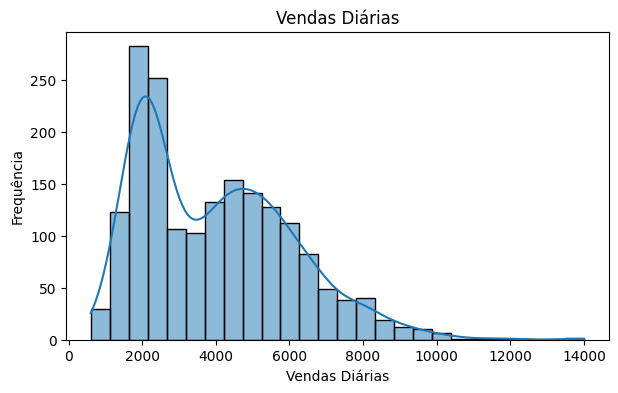

In [ ]:
plt.figure(figsize=(7,4))
np.random.seed(1)

sns.histplot(df.Sales, kde=True)
plt.title('Vendas Diárias')
plt.xlabel('Vendas Diárias')
plt.ylabel('Frequência')
plt.show()

# Q2A.

Qual a probabilidade aproximada das vendas ficarem abaixo de R$ 3.000 em um determinado dia.




In [ ]:
print(f'Probabilidade das vendas ficarem abaixo de R$ 3000 = {np.round((df.Sales < 3000).mean() * 100, 2)}%')

Probabilidade das vendas ficarem abaixo de R$ 3000 = 41.92%


# Q2B.

Qual o valor mínimo que você pode esperar vender em 95% dos dias? (renda mínima garantida)




In [ ]:
df.Sales.quantile(1-0.95)

np.float64(1449.7632023834285)

# Q2C.
Produza o gráfico de probabilidade acumulada das vendas. (`figsize=(6,3.5)`).

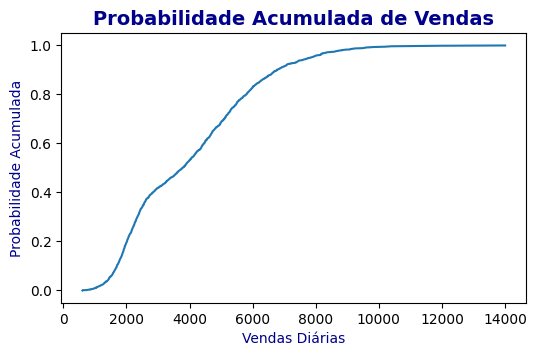

In [ ]:
cdf_values = np.sort(df.Sales)
prob_values = np.arange(len(df.Sales)) / float(len(df.Sales) -1)

fig, ax = plt.subplots(1, 1, figsize=(6,3.5))
sns.lineplot(x=cdf_values, y=prob_values, ax=ax)

ax.set_title('Probabilidade Acumulada de Vendas', color='darkblue', fontsize=14, weight='bold')
ax.set_xlabel('Vendas Diárias', color='darkblue')
ax.set_ylabel('Probabilidade Acumulada', color='darkblue')

plt.show()
